In [3]:
import numpy as np 
import pickle
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import os
import sys

In [4]:
!hostname

pcn-4-05


In [5]:
datapath="/mnt/home/bbhattarai/B3/"
freq_datapath="/mnt/home/bbhattarai/freq_data/"

In [6]:
snapshot=302
freq_datafile="DiskActions"+str(snapshot)+".npy"
freqs= np.load(freq_datapath+freq_datafile)

In [7]:
Jrdisk=freqs[0]
Jphidisk=freqs[1]
Jzdisk=freqs[2]
Trdisk=freqs[3]
Tphidisk=freqs[4]
Tzdisk=freqs[5]
Ordisk=freqs[6]
Ophidisk=freqs[7]
Ozdisk=freqs[8]
idd_from_freqs=freqs[9]

In [8]:
angle_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
datafilename="all_barangles_saved.ang"
ang_stored = open(angle_datapath+datafilename,'rb')
all_bangles=pickle.load(ang_stored)
print(len(all_bangles))

337


In [10]:
times=np.genfromtxt(datapath+'times.txt',dtype='str')
#print(len(times))
time=list()
for i in range(len(times)):
    t=float(times[i][11:-2])/1000 # in Gyr
    time.append(t)
#plt.plot(all_bangles)
time=np.array(time)
time=time*9.778145
#print(len(time))

# Plotting bar angle (in radians) vs time

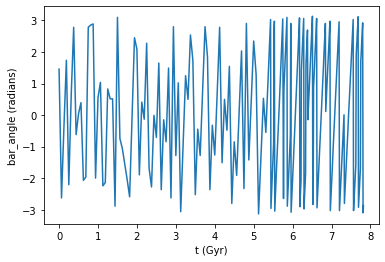

In [13]:
fig1=plt.figure()
ax=fig1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,bangle_radians)
plotname="bar_angle_vs_time.jpg"
#fig1.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()

# plotting in degrees

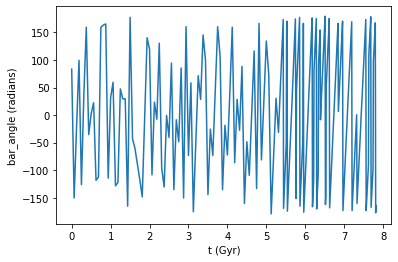

In [14]:
fig3=plt.figure()
ax=fig3.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("bar_angle (radians)")
#bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,all_bangles)
plotname="bar_angle_vs_time.jpg"
#fig3.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()

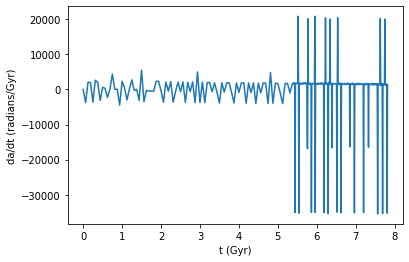

In [15]:
d_angle=np.diff(all_bangles)
dt=np.diff(time)
da_dt=d_angle/dt
zero=np.array([0])
da_dt_z=np.concatenate((zero,da_dt))
#print(da_dt)
#print(d_angle)

fig2=plt.figure()
ax=fig2.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
bangle_radians=np.deg2rad(all_bangles)
ax.plot(time,da_dt_z)
plotname="da_dt_vs_time.jpg"
#fig2.savefig(plotpath+plotname,bbox_inches="tight")
#print("Plot generated and saved to file: ",plotname)
#plt.tight_layout()
plt.show()

# Calculating da_dt numerically


In [17]:
#converted all angles to positive
a=np.array(all_bangles)
for i in range(len(a)):
    if (a[i]<0):
        a[i]=360+a[i]
print(a)
t=time

[ 83.50000917 209.50001201 338.50000257  99.4999973  233.50001944
  37.49998453 159.49999973 324.50000962   2.49999812  22.49997247
 241.49999861 247.50004842 159.49999742 163.49998384 165.49995279
 245.49999796  31.49999613  59.49999711 231.50001775 237.50003398
  47.49999907  29.49996775  29.50000322 194.50000565 177.49999868
 317.50000318 299.50000121 271.49999761 242.50005082 211.49999583
 357.50000036 140.49999069 119.49997734 251.50000076  23.50000657
 352.49998976 130.50000086 263.49999955 229.50001376 359.50000015
 319.5000093   94.49998955 224.50001267 351.49999617 311.5000295
  85.49994721 209.50001932 160.49998257 286.49999311  58.50000605
 184.50000045 306.49999845  71.49998108  28.49998445 145.49999653
  99.49999643 215.50000641 334.4999986  286.50004885  44.49999325
 160.49999766 106.50000837 224.50000495 341.50000291 287.50000394
  40.50000118 159.49999886 273.50000378  28.49999332 332.50002198
  88.49998456 199.50003024 311.49999912 250.50002927   5.50000184
 116.499977

209.500012 - 83.500009 = 126.000003
338.500003 - 209.500012 = 128.999991
99.499997 - 338.500003 = -239.000005
da <0 found
da is now 120.99999473177704
233.500019 - 99.499997 = 134.000022
37.499985 - 233.500019 = -196.000035
da <0 found
da is now 163.99996508905127
159.500000 - 37.499985 = 122.000015
324.500010 - 159.500000 = 165.000010
2.499998 - 324.500010 = -322.000012
da <0 found
da is now 37.9999884912625
22.499972 - 2.499998 = 19.999974
241.499999 - 22.499972 = 219.000026
d_a > 180 found
da is now:  39.00002613868014
247.500048 - 241.499999 = 6.000050
159.499997 - 247.500048 = -88.000051
da <0 found
da is now 271.9999490025935
d_a > 180 found
da is now:  91.9999490025935
163.499984 - 159.499997 = 3.999986
165.499953 - 163.499984 = 1.999969
245.499998 - 165.499953 = 80.000045
31.499996 - 245.499998 = -214.000002
da <0 found
da is now 145.9999981710709
59.499997 - 31.499996 = 28.000001
231.500018 - 59.499997 = 172.000021
237.500034 - 231.500018 = 6.000016
47.499999 - 237.500034 = -1

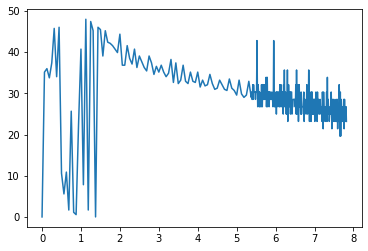

In [18]:
dadt=list()
da=list()
for i in range(1,len(t),1):
    #d=(a[i-1]-a[i])/(t[i-1]-t[i])
    d_a=(a[i]-a[i-1])
    print("%f - %f = %f"%(a[i],a[i-1],d_a))
    d_t=(t[i]-t[i-1])
    if d_a<0:
        print("da <0 found")
        d_a=a[i]+(360-a[i-1])  #if change in angle is negative, it is due to crossing the origin
        print("da is now",d_a)
    if d_a>180:                #if change in angle is greater than 180, the change in angle value we have is flipped by 180
        print("d_a > 180 found")
        d_a=d_a-180
        print("da is now: ",d_a)    
    da.append(d_a)
    #print(d_a)
    d_a_rad=np.deg2rad(d_a)
    d=d_a_rad/d_t
    dadt.append(d)

dadt=np.array(dadt)

zero=np.array([0])
dadtz=np.concatenate((zero,dadt))
#print(len(dadt))
#print(dadt)
plt.plot(time,dadtz)


# Fixing angles

Plot generated and saved to file:  da_dt_vs_time.jpg


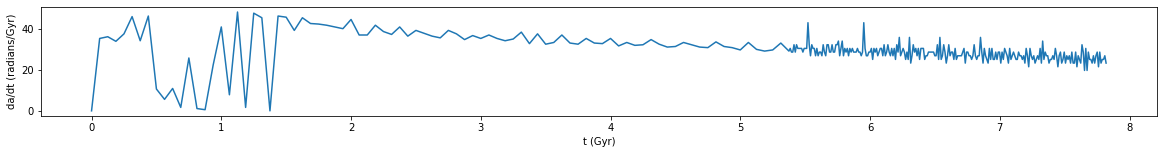

In [19]:
#import matplotlib
#from matplotlib.ticker import FuncFormatter, MultipleLocator
fig4=plt.figure(figsize=(20,2))
ax=fig4.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
#ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
ax.plot(time,dadtz)
plotname="da_dt_vs_time.jpg"
print("Plot generated and saved to file: ",plotname)
#fig4.savefig(plotname,bbox_inches="tight")
#plt.tight_layout()
plt.show()

# Finding the slope of the change in bar angle 

In [81]:
t_initial=t[32]
print(t_initial)
t_final=t[233]
print(t_final)

dadtz_initial=dadtz[32]
print(dadtz_initial)

dadtz_final=dadtz[233]
print(dadtz_final)
slope=(dadtz_final-dadtz_initial)/(t_final-t_initial)
print(slope)
a_tan=np.arctan(slope)
print(np.rad2deg(a_tan))
print(np.tan(a_tan))

2.000006133268
6.812396464549
44.39982067094068
26.773949169930663
-3.6626022179539666
-74.72874247841652
-3.662602217953968


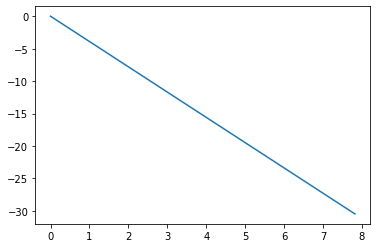

In [72]:
plt.plot(time,slope*time)

Plot generated and saved to file:  da_dt_vs_time.jpg


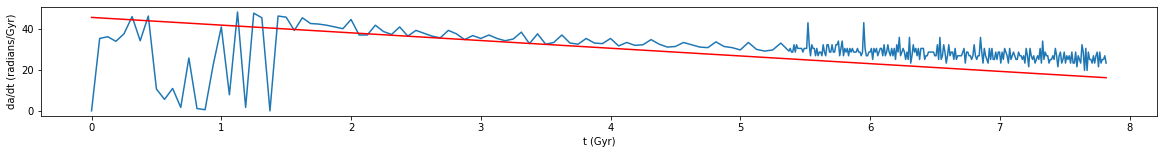

In [84]:

#import matplotlib
#from matplotlib.ticker import FuncFormatter, MultipleLocator
fig4_1=plt.figure(figsize=(20,2))
ax=fig4_1.add_subplot(111)
#ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
ax.set_xlabel("t (Gyr)")
ax.set_ylabel("da/dt (radians/Gyr)")
#ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
#ax.yaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
#ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
ax.plot(time,dadtz)
ax.plot(time,(slope*time+dadtz_initial)/(3.08567758/3.15576),c="red")
plotname="da_dt_vs_time.jpg"
print("Plot generated and saved to file: ",plotname)
#fig4_1.savefig(plotname,bbox_inches="tight")
#plt.tight_layout()
plt.show()

# Saving the pattern speed (frequency) of the bar in pickle file

In [ ]:
'''
datafilename="saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
dadtz_kms_kpc=dadtz*3.08567758/3.15576
with open(save_datapath+datafilename, 'wb') as output:
        pickle.dump(dadtz_kms_kpc, output)

'''

337
[0.00000000e+00 3.43996246e+01 3.52236189e+01 3.30402432e+01
 3.65906015e+01 4.47825103e+01 3.33086185e+01 4.50562916e+01
 1.03764344e+01 5.46042158e+00 1.06495088e+01 1.63839848e+00
 2.51179576e+01 1.09225287e+00 5.46119813e-01 2.18420683e+01
 3.98673647e+01 7.64579634e+00 4.69596915e+01 1.63838931e+00
 4.64208952e+01 4.42349988e+01 9.68591228e-06 4.50527651e+01
 4.45059722e+01 3.82265893e+01 4.42329307e+01 4.15031517e+01
 4.12365716e+01 4.06833601e+01 3.98648716e+01 3.90457266e+01
 4.34137993e+01 3.60422180e+01 3.60416493e+01 4.06903729e+01
 3.76804969e+01 3.63146901e+01 3.98648743e+01 3.54961137e+01
 3.82259925e+01 3.68613474e+01 3.54961238e+01 3.46818551e+01
 3.82265971e+01 3.65882832e+01 3.38573251e+01 3.57691545e+01
 3.44039321e+01 3.60416512e+01 3.44039277e+01 3.33112193e+01
 3.41362180e+01 3.74074478e+01 3.19460092e+01 3.65883057e+01
 3.16734614e+01 3.24920894e+01 3.60422253e+01 3.22195376e+01
 3.16779202e+01 3.44039321e+01 3.22195518e+01 3.19460054e+01
 3.44039295e+01 3.08

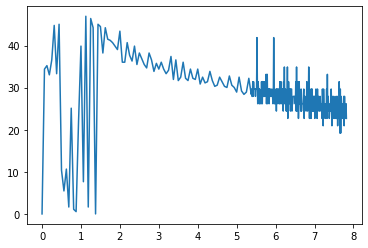

In [ ]:
datafilename="saved_bar_pattern_speed_km_per_s_kpc.ang"
save_datapath="/mnt/home/bbhattarai/resonance_sweeping/"
ps_stored = open(save_datapath+datafilename,'rb')
ps=pickle.load(ps_stored)
print(len(ps))
print(ps)

plt.plot(time,ps)